# Final phase 03 Project Submission

* Student name: Ingavi Kilavuka
* Student pace: full time
* Dataset: SyriaTel Customer Churn
* Instructor name: Mwikali 

# Executive summary
The project's objective is to utilize data analytics and machine learning methods to improve customer experiences and decrease churn for Syriatel, a top mobile network provider in Syria. In the competitive telecommunications sector, retaining current customers and ensuring their satisfaction are crucial for Syriatel's long-term success and growth. The goals of this project include:
- Determining whether customers are indeed leaving
- How can we best predict the amount of customers leaving
- How can this data assist Syriatel improve customer satisfaction 


## Table of contents 
1. [Business Understanding](#1-business-understanding)
    1. [About Syriatel](#11-about-syriatel)
    1. [Stakeholders](#12-stakeholders)
    1. [Business Problem](#13-business-problem)
2. [Data Understanding](#2-data-understanding)
    1. [Data Cleaning](#21-data-cleaning)
3. [EDA](#3-eda)
    1. [Univariate analysis](#31-univariate-analysis)
    2. [Bivariate analysis](#32-bivariate-analysis)
    3. [Encoding](#33-encoding)
                    (1.[Label Encoder](#331-label-encoding))
                    (2.[One-Hot Encoder](#332-one-hot-encoding))
4. [Modeling](#4-modeling)
    1. [Logistic Regression](#41-logistic-regression)
    2. [Decision Tree](#42-decision-tree)
    3. [Random Forest](#43-random-forest)
    4. [KNN](#44-k-nearest-neighbors)


## 1. Business understanding

### 1.1 About Syriatel
Syriatel (Arabic: سيريتل) is a leading mobile network provider in Syria, established in January 2000 with its headquarters in Damascus. It is one of the only two mobile service providers in the country, alongside MTN Syria. In 2022, Wafa Telecom was awarded the third telecom license by the Syrian telecommunications authority. Syriatel offers LTE services under the brand name Super Surf, providing speeds up to 150 Mb/s.

Initially, Syriatel operated under a Build-Own-Transfer (BOT) contract for 15 years, with management provided by Orascom. In 2017, the company introduced 4G services. On June 5, 2020, a Syrian court placed Syriatel under judicial custody.

### 1.2 Stakeholders
- **Customers:** Existing customers are directly affected by the company's efforts to reduce churn, which often lead to improved services, better customer support, and enhanced loyalty programs. Customers who experience better service are less likely to leave
- **Management:** Responsible for strategic decision-making, they are directly impacted by customer churn as it affects the company's revenue, profitability, and market position. High churn rates can indicate issues with customer satisfaction or service quality, prompting them to implement corrective measures 
- **Employees:** Job security and career growth for employees can be affected by churn. If high churn rates lead to financial losses, it might result in cost-cutting measures, including layoffs or reduced resources for employee development

### 1.3 Business Problem
Customer churn or attrition, is where customers stop doing business with a company or service provider over a given period.For Syriatel, customer churn happens when subscribers cancel their services or switch to a competitor. High churn rates can significantly impact the company's revenue and growth, making it crucial for businesses to implement strategies to reduce churn and retain customers.

Churn can be categorized into two types:

1. **Voluntary Churn:** This occurs when customers choose to leave a service on their own, often due to dissatisfaction with the service quality, better offers from competitors, or changes in their personal needs.

2. **Involuntary Churn:** This happens when the company terminates the customer's service, often due to non-payment or breaches of contract terms.

Understanding and addressing the factors contributing to churn is essential for Syriatel to maintain a stable customer base and ensure long-term success.


### 2. Data Understanding 

In [161]:
# Imports 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# Imports for Modeling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


#Metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss



In [92]:
# Loading Dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv') 

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [93]:
# Checking for information on data types and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [94]:
#Checking data shape
df.shape

(3333, 21)

In [95]:
# Checking dataset using descriptive statistics 
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [96]:
# Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [97]:
# Checking for duplicate values
df.duplicated().sum()

0

### 2.1 Data Cleaning

In [98]:
def data_cleaning(df):
    missing = df.isna().sum().sum()
    duplicates = df.duplicated().sum()
    return (f"There are {missing} missing values and {duplicates} duplicated values in the dataset")

data_cleaning(df)

'There are 0 missing values and 0 duplicated values in the dataset'

In [99]:
#Dropping Phone number column as it is not useful
df.drop('phone number', axis=1, inplace=True)

In [100]:
# Checking that the column it's dropped.
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

## 3. EDA

### 3.1 Univariate analysis

Distribution of Churn

In [101]:
# Plotting the target variable distribution
class_counts = df.groupby("churn").size()

fig = go.Figure(
    data=[go.Bar(x=class_counts.index, y=class_counts.values)],
    layout=go.Layout(title="Churn Distribution", xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]), 
          hovermode = 'closest',width=600)
)

# Show the chart
fig.show()

Distribution of each predictor column

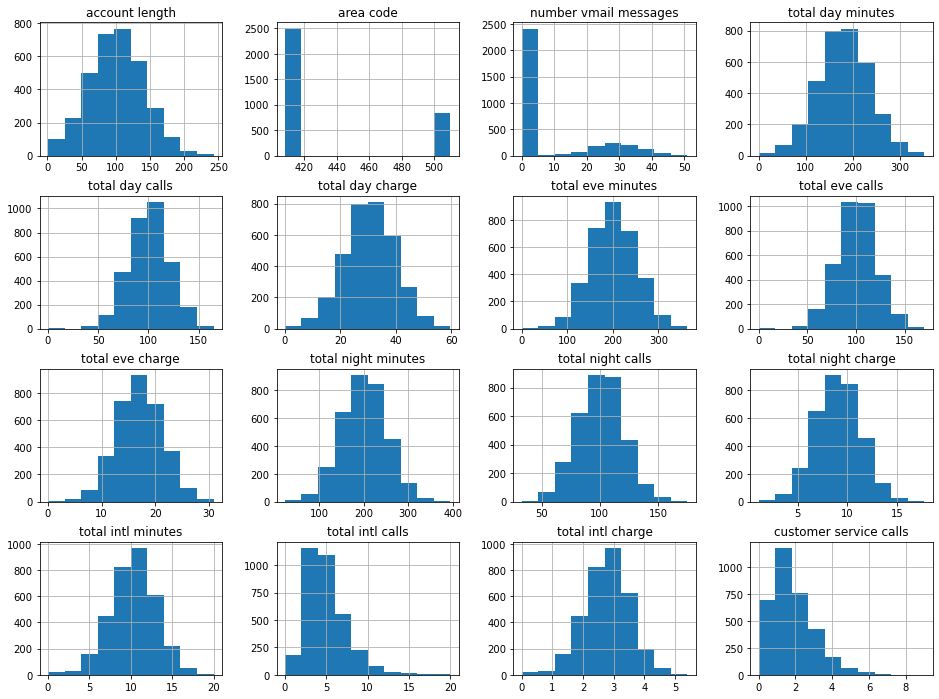

In [102]:
pd.plotting.hist_frame(df.drop('churn',axis=1),figsize=(16,12));

### 3.2 Bivariate analysis

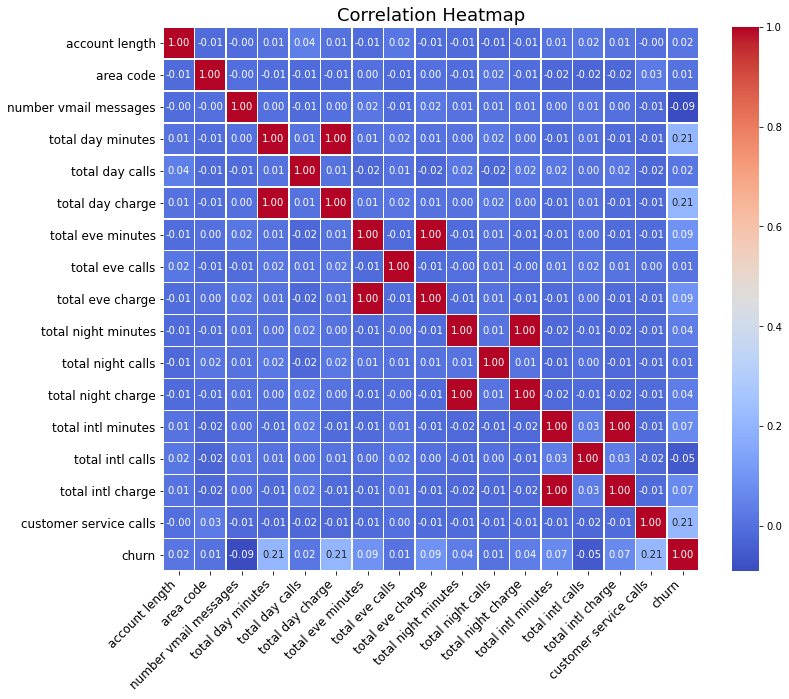

In [103]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

The majority of features do not exhibit strong correlations, but some display perfect correlations:
* Total day charge and total day minutes features are fully positively correlated.
* Total eve charge and total eve minutes features are fully positively correlated.
* Total night charge and total night minutes features are fully positively correlated.
* Total int charge and total int minutes features are fully positively correlated.

This perfect correlation is justifiable because the charge is directly influenced by the minutes used.

Comparing the churn rates for each state

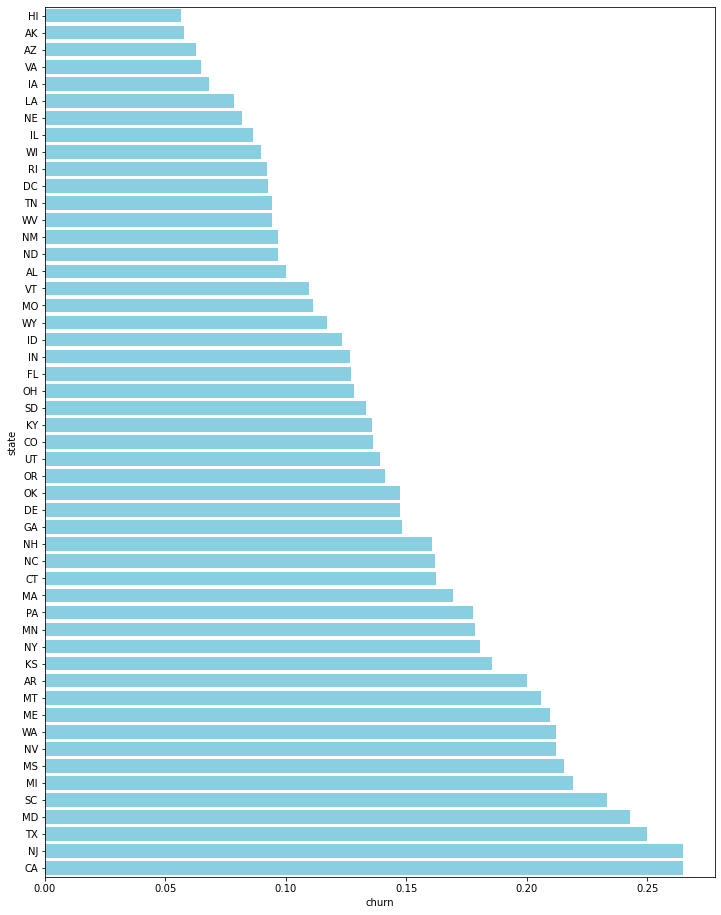

In [104]:
states = df.groupby('state').churn.agg(np.mean)
states.sort_values(ascending=True, inplace=True)
fig,ax = plt.subplots(figsize=(12,16))
sns.barplot(x=states,y=states.index,ax=ax,color='#7ad7f0');

International plan correlated to churn

In [105]:
print(df.groupby('international plan')['churn'].agg(np.mean))
print(df.groupby('international plan')['churn'].agg(np.std))

international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64
international plan
no     0.319015
yes    0.494980
Name: churn, dtype: float64


Voice mail plan correlated to churn

In [106]:
print(df.groupby('voice mail plan')['churn'].agg(np.mean))
print(df.groupby('voice mail plan')['churn'].agg(np.std))

voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64
voice mail plan
no     0.373188
yes    0.281647
Name: churn, dtype: float64


Churn by charges

In [107]:
def plot_churn_kde(df, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

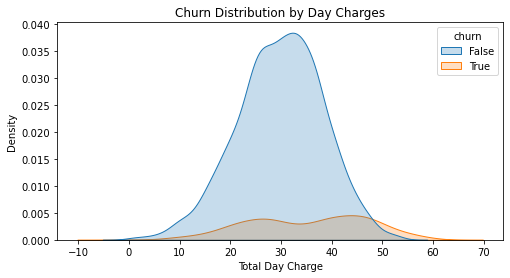

In [108]:
# Churn by day charges
plot_churn_kde(df, 'total day charge', 'Day')

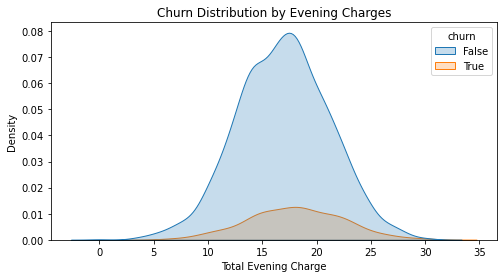

In [109]:
# Churn by evening charges
plot_churn_kde(df, 'total eve charge', 'Evening')

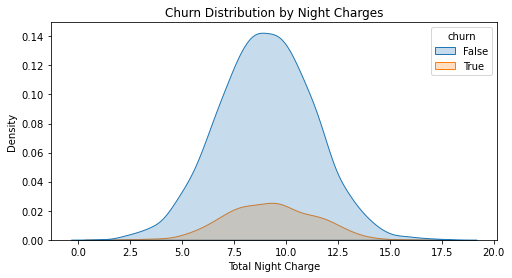

In [110]:
# Churn by night charges
plot_churn_kde(df, 'total night charge', 'Night')

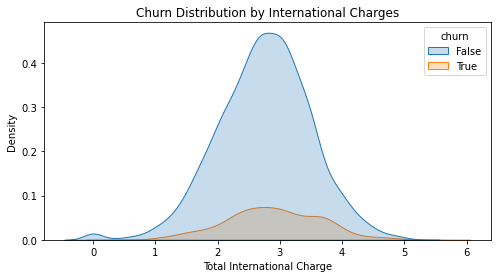

In [111]:
plot_churn_kde(df, 'total intl charge', 'International')

All these show that the higher the charger the higher the churn

### 3.3 Encoding

#### 3.3.1 Label encoding

In [112]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == object and set(df[column].unique()) == {'yes', 'no'}:
        df[column] = label_encoder.fit_transform(df[column])

print("\nEncoded DataFrame:")
print(df)



Encoded DataFrame:
     state  account length  area code  international plan  voice mail plan  \
0       KS             128        415                   0                1   
1       OH             107        415                   0                1   
2       NJ             137        415                   0                0   
3       OH              84        408                   1                0   
4       OK              75        415                   1                0   
...    ...             ...        ...                 ...              ...   
3328    AZ             192        415                   0                1   
3329    WV              68        415                   0                0   
3330    RI              28        510                   0                0   
3331    CT             184        510                   1                0   
3332    TN              74        415                   0                1   

      number vmail messages  total day minu

#### 3.3.2 One-Hot encoding

In [142]:
categorical_columns = ['state', 'area code', 'international plan', 'voice mail plan']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  
)

In [120]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_0.0,area code_0.06862745098039191,area code_1.0,international plan_0.0,international plan_1.0,voice mail plan_0.0,voice mail plan_1.0
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## 4. Modeling 

### 4.1 Base modeling 

In [143]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

In [144]:
# Performing a test split for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [145]:
sm = SMOTE()
#fit
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)

### 4.2 Logistic Regression 

In [146]:
logreg = LogisticRegression(random_state=110)

logreg.fit(resampled_X_train, resampled_y_train)

y_pred_log = logreg.predict(X_test)

Logistic Regression:
Accuracy: 0.7961019490254873
Precision: 0.3870967741935484
Recall: 0.7659574468085106
F1 Score: 0.5142857142857143


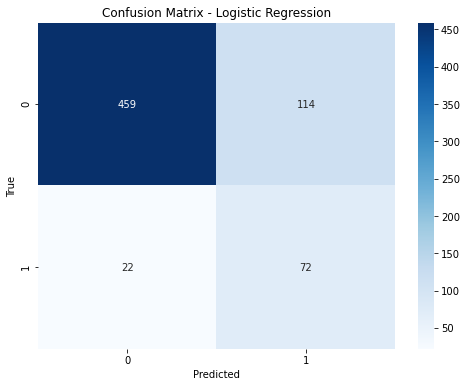

In [150]:
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print('Logistic Regression:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### 4.3 Decision Tree

In [153]:
dt_clf = DecisionTreeClassifier(random_state=110)

dt_clf.fit(resampled_X_train,resampled_y_train)

y_pred_log = dt_clf.predict(X_test)

Decision Tree:
Accuracy: 0.9835082458770614
Precision: 0.9191919191919192
Recall: 0.9680851063829787
F1 Score: 0.9430051813471503


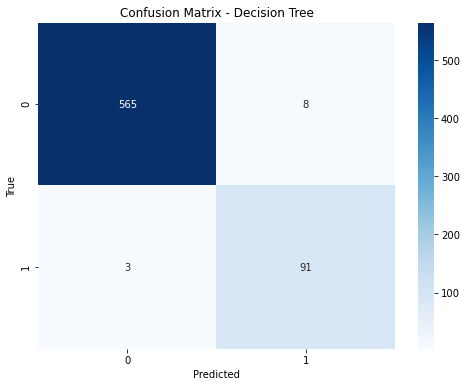

In [154]:
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print('Decision Tree:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 4.4 Random Forest 

In [157]:
rf_clf= RandomForestClassifier(random_state=110)

rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=110)

y_pred_log = rf_clf.predict(X_test)

Random Forest:
Accuracy: 0.9880059970014993
Precision: 0.967391304347826
Recall: 0.9468085106382979
F1 Score: 0.956989247311828


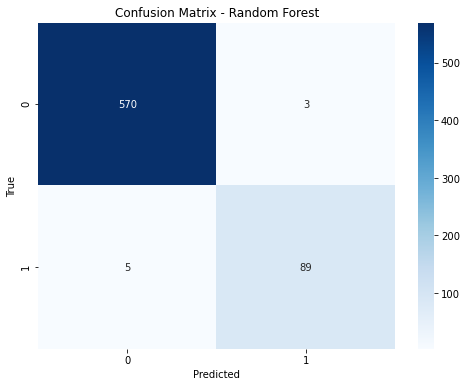

In [158]:
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print('Random Forest:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 4.5 K-nearest neighbors

In [159]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(resampled_X_train, resampled_y_train)

y_pred = knn_clf.predict(X_test)

K-Nearest Neighbors:
Accuracy: 0.8335832083958021
Precision: 0.4530386740331492
Recall: 0.8723404255319149
F1 Score: 0.5963636363636364


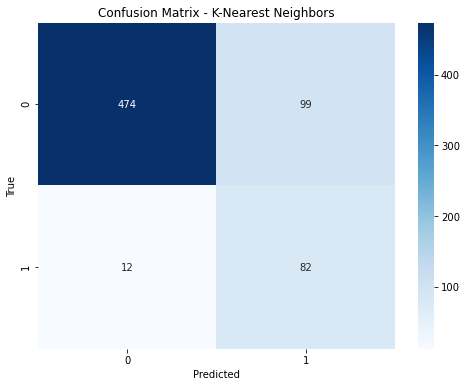

In [160]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('K-Nearest Neighbors:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()